In [2]:
#bibliotecas utilizadas
import scipy as spy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import control as ctrl
#import slycot
from scipy import signal

Parâmetros

In [3]:
#constantes
Lc= 0.19 #m
kb= 40000.0 #N/m
kt= 50502.0 #N/m
kp= 30250.0 #N/m
kcinto= 52500.0 #N/m
kpe= 105000.0 #N/m
bb= 220.0 #N.s/m 
bt= 443.1 #N.s/m
bp= 2408.04 #N.s/m
bcinto= 250.0 #N.s/m
bpe= 325.0 #N.s/m


mb= 35.0 #kg
mt= 42.609 #kg
mp= 21.238 #kg
mc= 6.153 #kg
jc= 0.02 #kg/m^2
Bc= 2.4692 #N.m.s/rad
Kc= 21.678 #N.m/rad
g = 9.8 #m/s^2
# Parâmetros de simulação
tf = 20.0
t = np.linspace(0, tf, 100000)



Análise de estabilidade aceleração

Polos do sistema: [-133.40879759 +0.j           -8.35890059+59.02722081j
   -8.35890059-59.02722081j  -14.69178861+31.79559828j
  -14.69178861-31.79559828j  -26.5923856  +0.j
   -5.0990549  +4.0266784j    -5.0990549  -4.0266784j ]


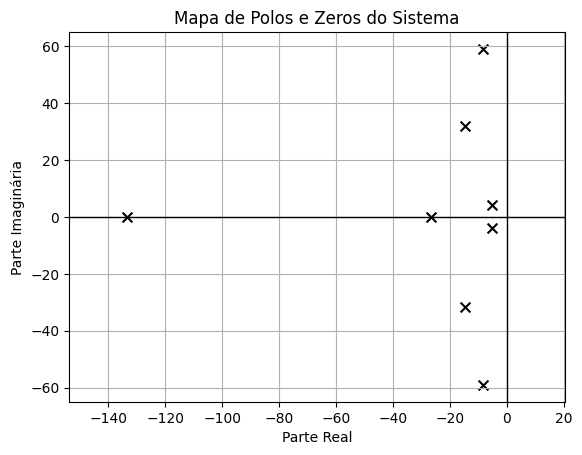

Função de Transferência para saída 1:

    2.842e-13 s^7 + 4.729e-11 s^6 - 9.087 s^5 - 226.4 s^4 + 7.366e+04 s^3 + 7.359e+06 s^2 + 7.045e+07 s + 2.784e+08
------------------------------------------------------------------------------------------------------------------------
s^8 + 216.3 s^7 + 1.834e+04 s^6 + 1.306e+06 s^5 + 5.528e+07 s^4 + 1.628e+09 s^3 + 2.892e+10 s^2 + 2.059e+11 s + 6.53e+11



Função de Transferência para saída 2:

       5.684e-14 s^7 - s^6 - 157.8 s^5 - 1.294e+04 s^4 - 5.758e+05 s^3 - 2.157e+07 s^2 - 1.871e+08 s - 6.951e+08
------------------------------------------------------------------------------------------------------------------------
s^8 + 216.3 s^7 + 1.834e+04 s^6 + 1.306e+06 s^5 + 5.528e+07 s^4 + 1.628e+09 s^3 + 2.892e+10 s^2 + 2.059e+11 s + 6.53e+11



Função de Transferência para saída 3:

     3.411e-13 s^7 + 5.821e-11 s^6 - 49.38 s^5 - 2060 s^4 - 1.574e+05 s^3 - 3.092e+06 s^2 - 2.225e+07 s - 6.772e+07
------------------------------------------------

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


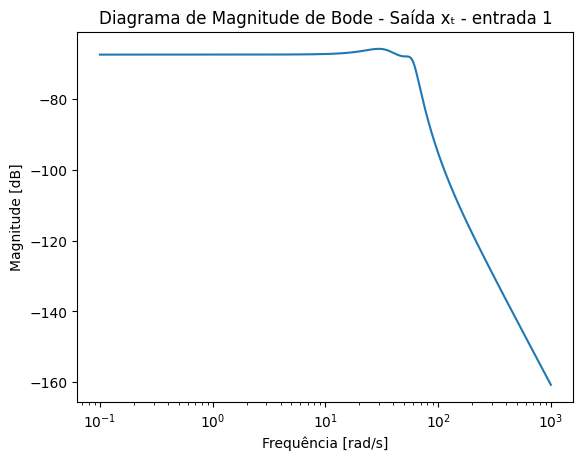

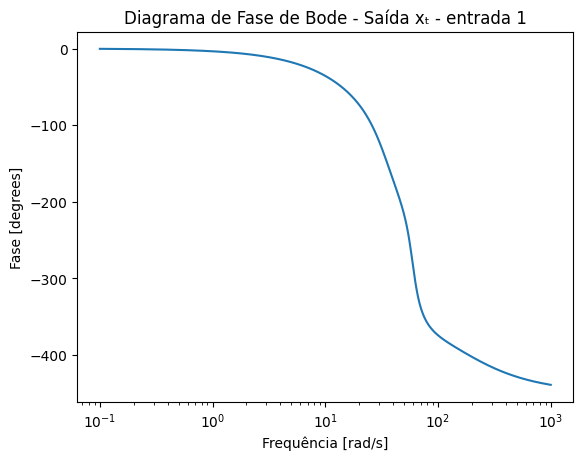

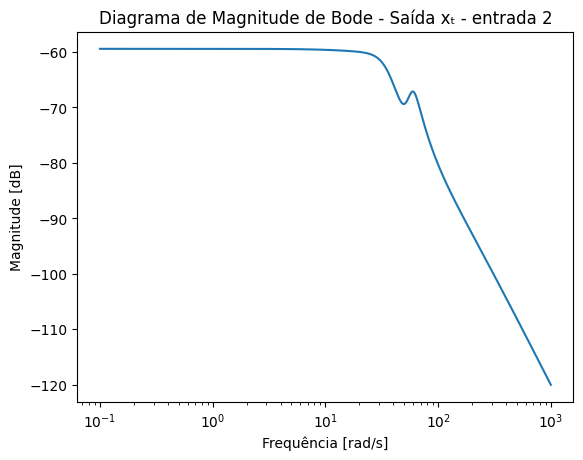

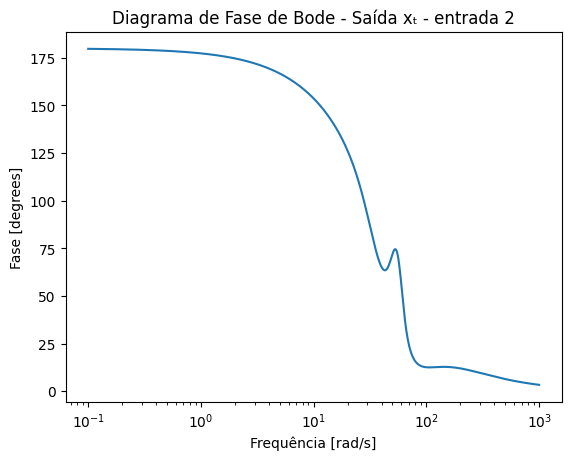

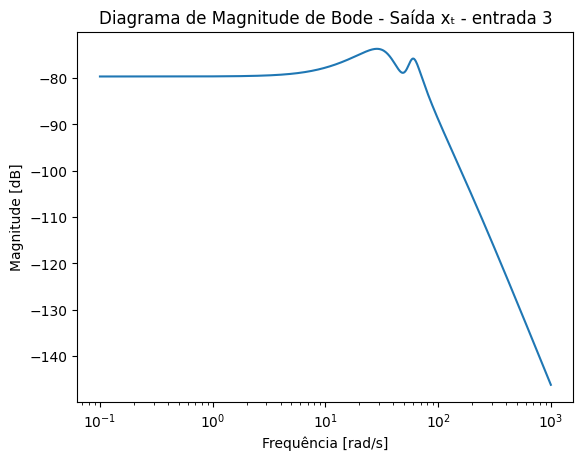

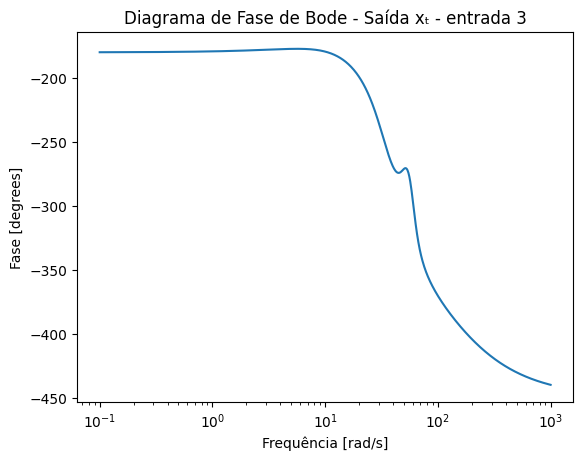

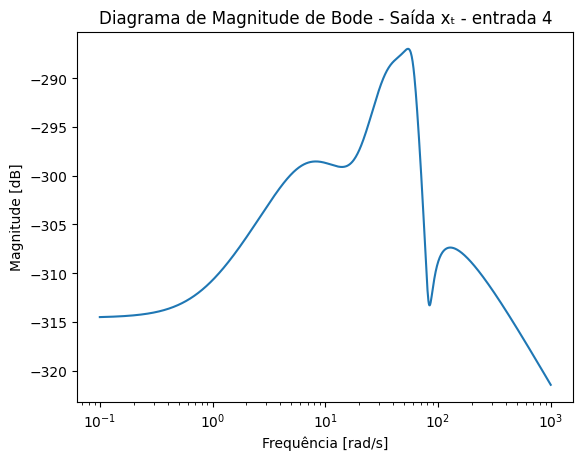

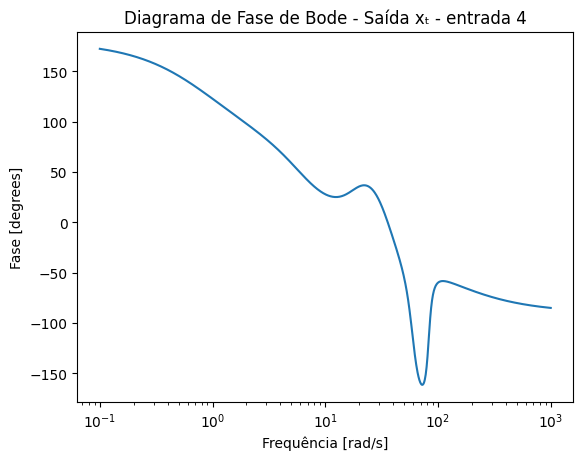

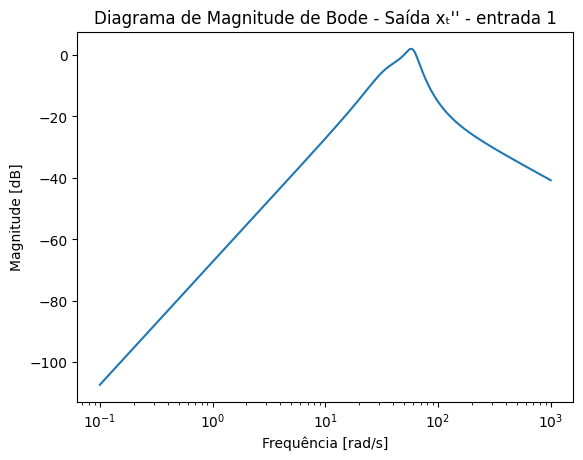

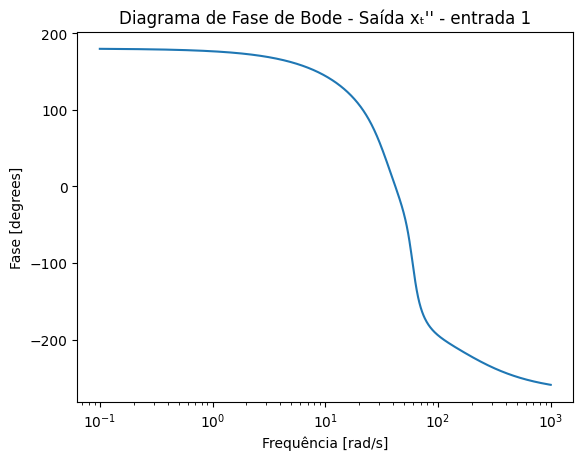

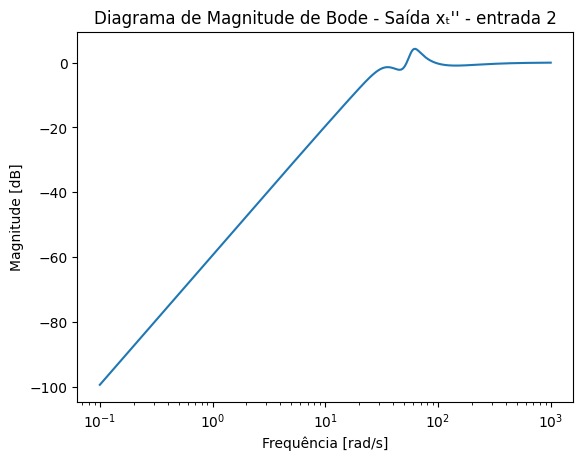

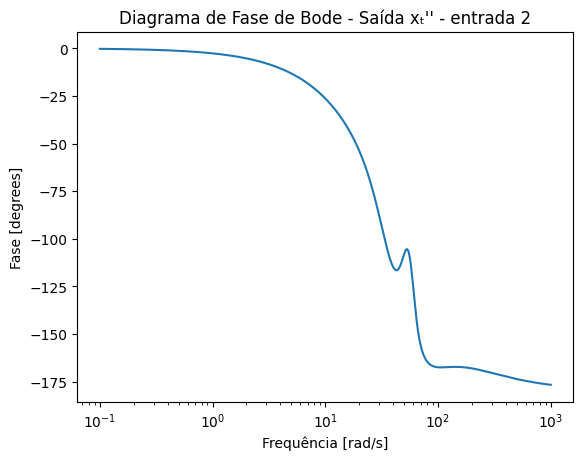

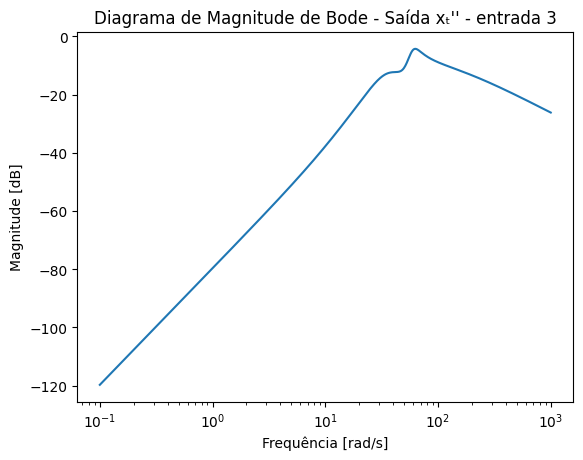

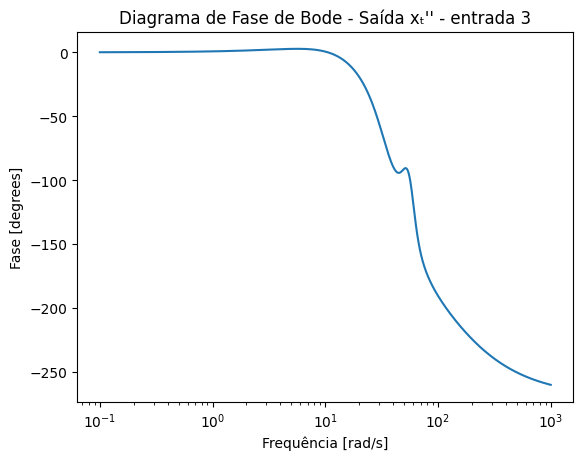

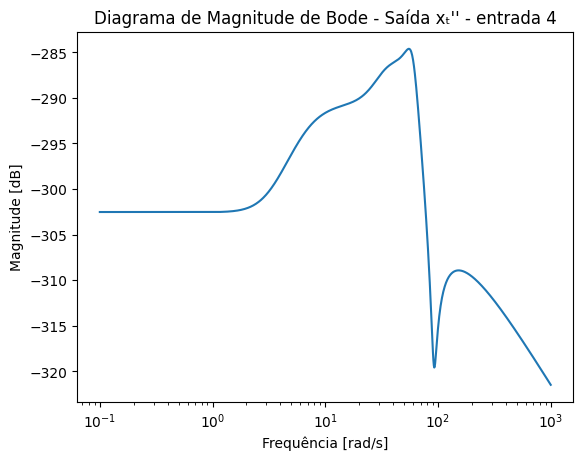

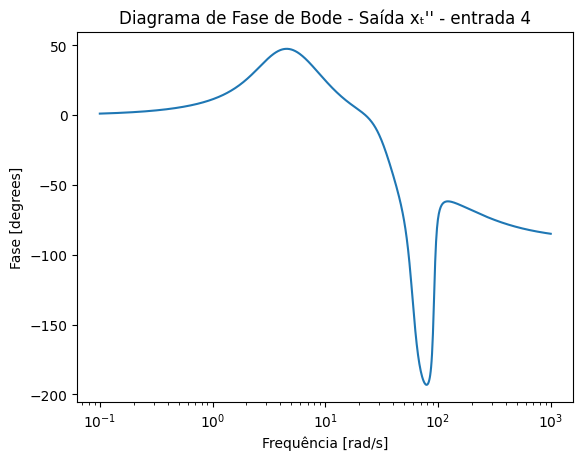

In [67]:
# Defina as matrizes do espaço de estados
A = np.array([[0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1],
              [-(kb+kt)/mb, -kt/mb, 0, 0, -(bb+bt)/mb, -bt/mb, 0, 0],
              [-kt/(mt+mc), -(kt+kp)/(mt+mc), kp/(mt+mc), 0, bt/(mt+mc), -(bt+bp)/(mt+mc), bp/(mt+mc), 0],
              [0, kp/mp, -(kp+kpe)/mp, 0, 0, bp/mp, -(bp+bpe)/mp, 0],
              [0, 0, 0, (mc*Lc*g-Kc)/(jc+mc*Lc**2), 0, 0, 0, -Bc/(jc+mc*Lc**2)]])

B = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [-1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])

C = np.array([[0, 1, 0, 0, 0, 0, 0, 0],
              [-kt/(mt+mc), -(kt+kp)/(mt+mc), kp/(mt+mc), 0, bt/(mt+mc), -(bt+bp)/(mt+mc), bp/(mt+mc), 0]])

D = np.array([[0, 0, 0, 0], [0, -1, 0, 0]])

# Obtenha os polos do sistema
polos = np.linalg.eigvals(A)

# Imprima os polos
print("Polos do sistema:", polos)

# Crie um mapa de polos
plt.figure()
ctrl.pzmap(ctrl.ss(A, np.zeros_like(A), np.eye(len(A)), np.zeros((len(A), len(A[0])))))
plt.title('Mapa de Polos e Zeros do Sistema')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.show()

# Crie um sistema de espaço de estados
sys_ss = ctrl.StateSpace(A, B, C, D)

# Obtenha o número de saídas e entradas
num_outputs = sys_ss.C.shape[0]
num_inputs = sys_ss.B.shape[1]

# Inicialize uma lista para armazenar as funções de transferência
sys_tf_list = []

# Itere sobre as saídas
for i in range(num_outputs):
    # Itere sobre as entradas
    for j in range(num_inputs):
        sys_tf_list.append(ctrl.ss2tf(sys_ss[i, j]))
        
for idx, sys_tf in enumerate(sys_tf_list):
    print(f"Função de Transferência para saída {idx+1}:")
    print(sys_tf)
    print("\n")

numeradores = [[0, 2.842e-13, 4.729e-11, -9.087, -226.4, 7.366e4, 7.359e6, 7.045e7, 2.784e8],
    [0, 5.684e-14, -1, -157.8, -1.294e4, -5.758e5, -2.157e7, -1.871e8, -6.951e8],
    [0, 3.411e-13, 5.821e-11, -49.38, -2060, -1.574e5, -3.092e6, -2.225e7, -6.772e7],
    [0, 8.527e-14, 1.091e-11, 9.313e-10, 7.451e-08, 1.669e-06, 2.67e-05, 0.0001221, -0.0001221],
    [0, -9.087, -226.4, 7.366e4, 7.359e6, 7.045e7, 2.784e8, -0.0002136, -0.001221],
    [-1, -157.8, -1.294e4, -5.758e5, -2.157e7, -1.871e8, -6.951e8, 0.0006104, 0.001465],
    [0, -49.38, -2060, -1.574e5, -3.092e6, -2.225e7, -6.772e7, -0.0001526, -0.0006104],
    [0, 8.527e-14, 1.091e-11, 1.164e-09, 9.686e-08, 3.099e-06, 6.104e-05, 0.0002441, 0.0004883]]
denominador = [1, 216.3, 1.834e4, 1.306e6, 5.528e7, 1.628e9, 2.892e10, 2.059e11, 6.53e11]

# Nomes para as saídas
nomes_saidas = ["Saída xₜ - entrada 1", "Saída xₜ - entrada 2", "Saída xₜ - entrada 3", "Saída xₜ - entrada 4", "Saída xₜ'' - entrada 1", "Saída xₜ'' - entrada 2", "Saída xₜ'' - entrada 3", "Saída xₜ'' - entrada 4"]

# Faixa de frequência desejada (de 10^-1 a 10^3 rad/s)
freq_min = 1e-1
freq_max = 1e3

# Loop sobre as diferentes listas de numeradores
for i, num in enumerate(numeradores):
    sys = signal.TransferFunction(num, denominador)

    # Calcular a resposta em frequência na faixa desejada
    w, mag, phase = signal.bode(sys, np.logspace(np.log10(freq_min), np.log10(freq_max), num=1000))

    # Plotar o diagrama de Bode com títulos específicos
    plt.figure()
    plt.semilogx(w, mag)    # Bode magnitude plot
    plt.title(f'Diagrama de Magnitude de Bode - {nomes_saidas[i]}')
    plt.xlabel('Frequência [rad/s]')
    plt.ylabel('Magnitude [dB]')

    plt.figure()
    plt.semilogx(w, phase)  # Bode phase plot
    plt.title(f'Diagrama de Fase de Bode - {nomes_saidas[i]}')
    plt.xlabel('Frequência [rad/s]')
    plt.ylabel('Fase [degrees]')

plt.show()


Análise estabilidade frenagem

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-2.64285714e+03 -1.50000000e+03  0.00000000e+00  0.00000000e+00
  -1.34285714e+01 -7.14285714e+00  0.00000000e+00  0.00000000e+00]
 [-1.07665805e+03 -1.69701817e+03  6.20360116e+02  0.00000000e+00
   5.12694311e+00 -5.45104795e+01  4.93835364e+01  0.00000000e+00]
 [ 0.00000000e+00  1.42433374e+03 -6.36830210e+03  0.00000000e+00
   0.00000000e+00  1.13383558e+02 -1.28686317e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.22144998e+01
   

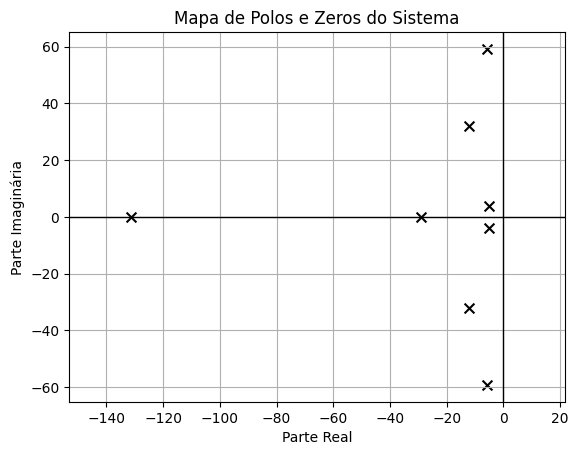

Função de Transferência para saída 1:

    -2.558e-13 s^7 - 2.91e-11 s^6 + 5.127 s^5 - 364.6 s^4 - 1.099e+05 s^3 - 7.954e+06 s^2 - 7.439e+07 s - 2.894e+08
------------------------------------------------------------------------------------------------------------------------
s^8 + 206.8 s^7 + 1.667e+04 s^6 + 1.198e+06 s^5 + 5.054e+07 s^4 + 1.493e+09 s^3 + 2.829e+10 s^2 + 2.068e+11 s + 6.73e+11



Função de Transferência para saída 2:

       -1.99e-13 s^7 + s^6 + 152.3 s^5 + 1.223e+04 s^4 + 5.411e+05 s^3 + 2.162e+07 s^2 + 1.896e+08 s + 7.105e+08
------------------------------------------------------------------------------------------------------------------------
s^8 + 206.8 s^7 + 1.667e+04 s^6 + 1.198e+06 s^5 + 5.054e+07 s^4 + 1.493e+09 s^3 + 2.829e+10 s^2 + 2.068e+11 s + 6.73e+11



Função de Transferência para saída 3:

     -1.705e-13 s^7 - 7.276e-12 s^6 + 49.38 s^5 + 1787 s^4 + 1.54e+05 s^3 + 3.11e+06 s^2 + 2.258e+07 s + 6.921e+07
-------------------------------------------------

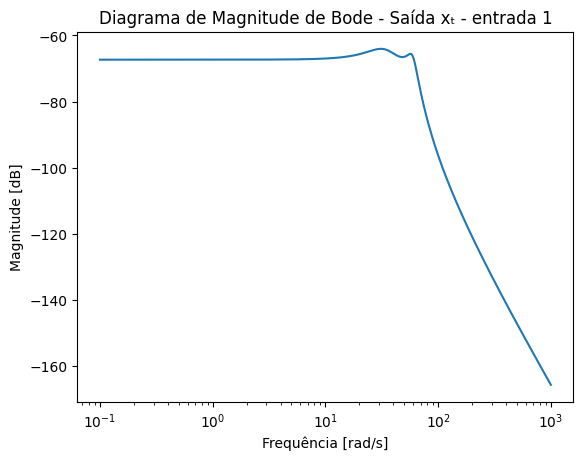

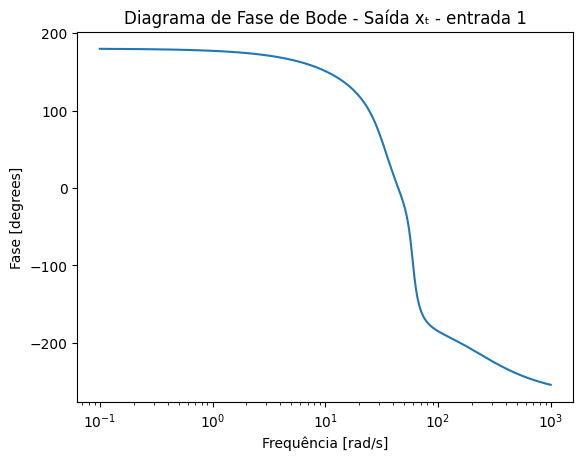

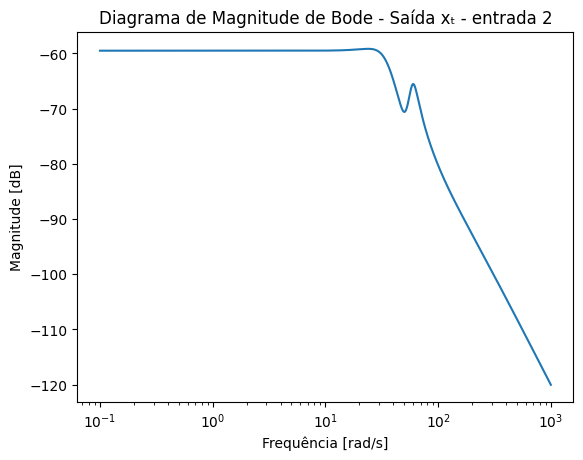

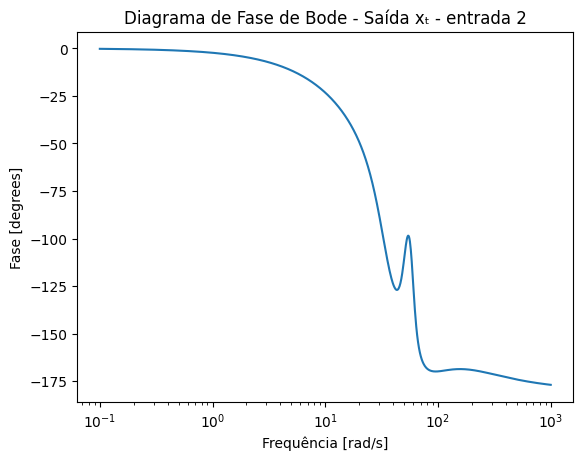

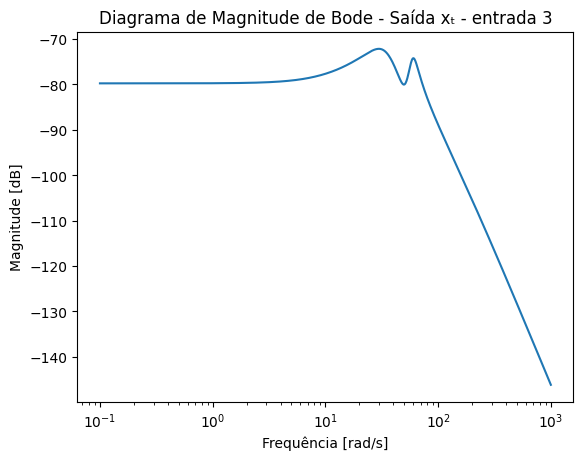

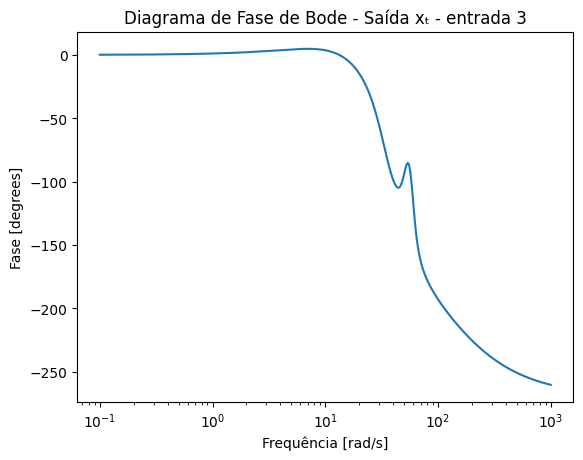

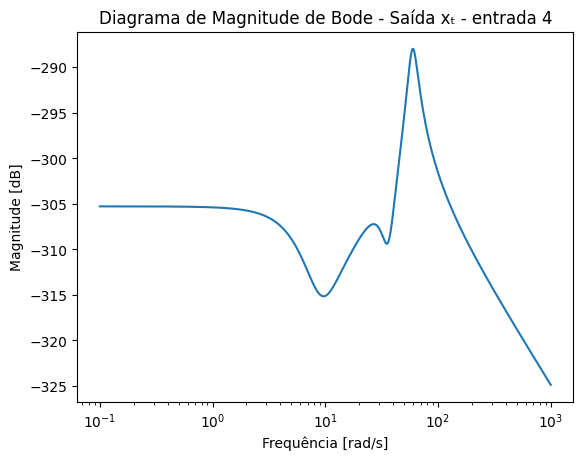

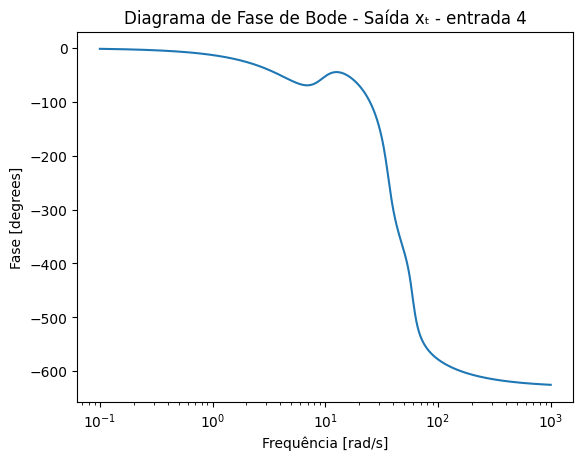

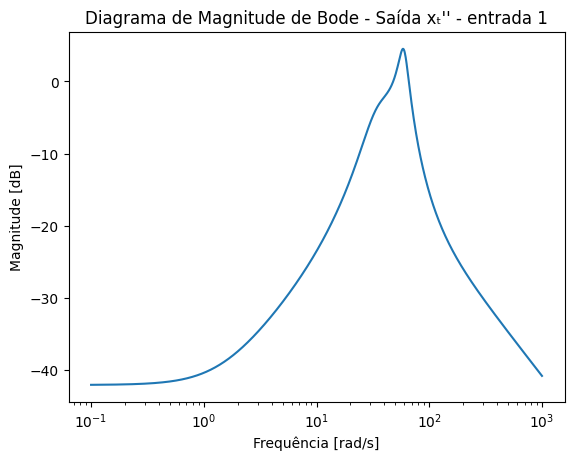

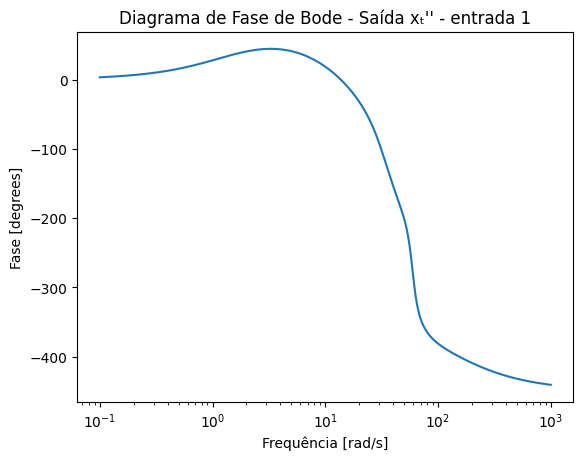

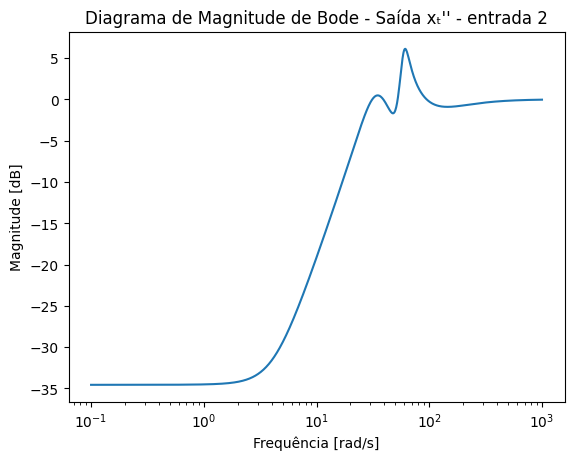

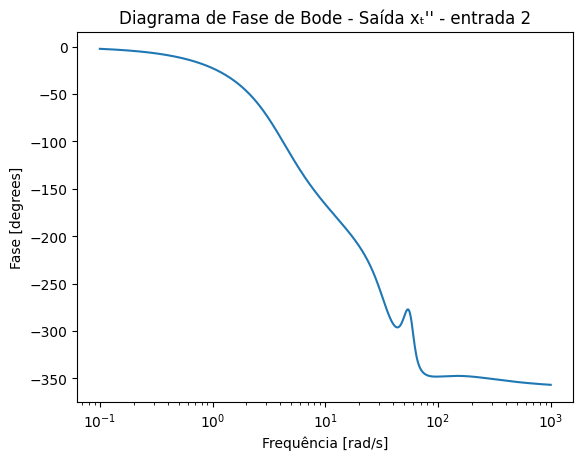

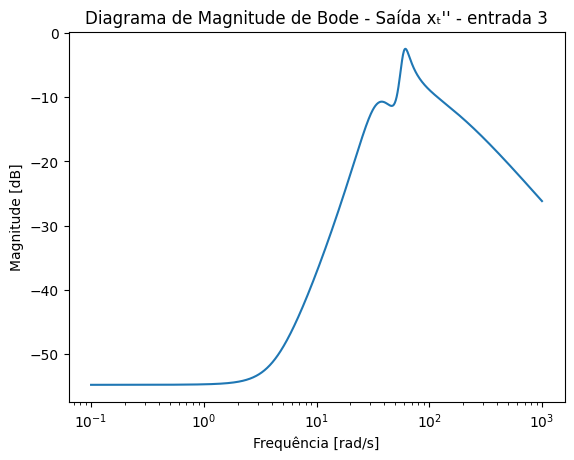

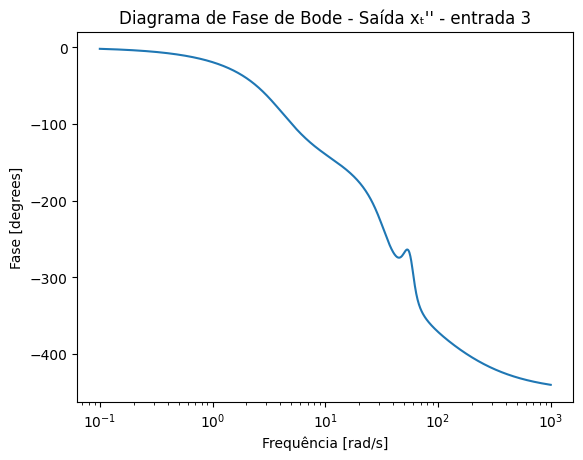

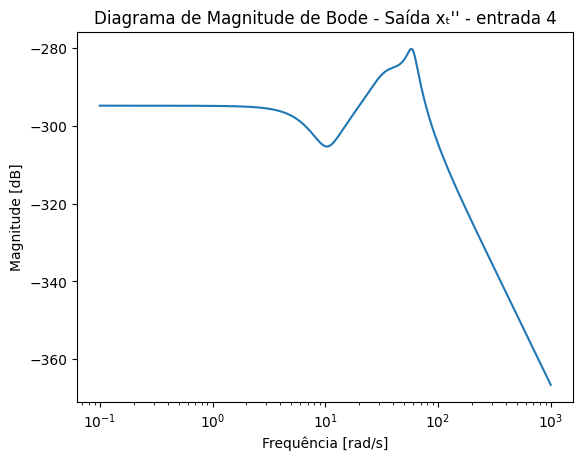

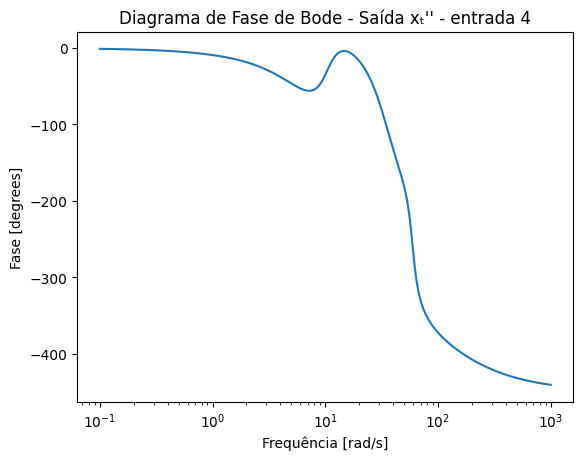

In [68]:
# Defina as matrizes do espaço de estados
A = np.array([[0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1],
              [-(kb+kcinto)/mb, -kcinto/mb, 0, 0, -(bb+bcinto)/mb, -bcinto/mb, 0, 0],
              [-kcinto/(mt+mc), -(kcinto+kp)/(mt+mc), kp/(mt+mc), 0, bcinto/(mt+mc), -(bcinto+bp)/(mt+mc), bp/(mt+mc), 0],
              [0, kp/mp, -(kp+kpe)/mp, 0, 0, bp/mp, -(bp+bpe)/mp, 0],
              [0, 0, 0, (mc*Lc*g-Kc)/(jc+mc*Lc**2), 0, 0, 0, -Bc/(jc+mc*Lc**2)]])

print(A)

B = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

C = np.array([[0, 1, 0, 0, 0, 0, 0, 0],
              [-kt/(mt+mc), -(kt+kp)/(mt+mc), kp/(mt+mc), 0, bt/(mt+mc), -(bt+bp)/(mt+mc), bp/(mt+mc), 0]])

D = np.array([[0, 0, 0, 0], [0, 1, 0, 0]])

# Obtenha os polos do sistema
polos = np.linalg.eigvals(A)

# Imprima os polos
print("Polos do sistema:", polos)

# Crie um mapa de polos
plt.figure()
ctrl.pzmap(ctrl.ss(A, np.zeros_like(A), np.eye(len(A)), np.zeros((len(A), len(A[0])))))
plt.title('Mapa de Polos e Zeros do Sistema')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.show()

# Crie um sistema de espaço de estados
sys_ss = ctrl.StateSpace(A, B, C, D)

# Obtenha o número de saídas e entradas
num_outputs = sys_ss.C.shape[0]
num_inputs = sys_ss.B.shape[1]

# Inicialize uma lista para armazenar as funções de transferência
sys_tf_list = []

# Itere sobre as saídas
for i in range(num_outputs):
    # Itere sobre as entradas
    for j in range(num_inputs):
        sys_tf_list.append(ctrl.ss2tf(sys_ss[i, j]))
        
for idx, sys_tf in enumerate(sys_tf_list):
    print(f"Função de Transferência para saída {idx+1}:")
    print(sys_tf)
    print("\n")

numeradores = [[0, -2.558e-13, -2.91e-11, 5.127, -364.6, -1.099e5, -7.954e6, -7.439e7, -2.894e8],
    [0, -1.99e-13, 1, 152.3, 1.223e4, 5.411e5, 2.162e7, 1.896e8, 7.105e8],
    [0, -1.705e-13, -7.276e-12, 49.38, 1787, 1.54e5, 3.11e6, 2.258e7, 6.921e7],
    [0, -5.684e-14, -7.276e-12, 0, -7.451e-09, 0, 3.815e-06, 3.052e-5, 0.0003662],
    [0, 9.087, 421.9, -5.525e4, -4.971e6, 3.233e7, 7.516e8, 4.638e9, 5.305e9],
    [1, 148.4, 1.164e4, 4.888e5, 1.884e7, 6.748e7, -7.522e7, -1.046e9, 1.259e10],
    [0, 49.38, 1592, 1.476e5, 2.233e6, 6.299e6, -1.504e7, -2.902e7, 1.226e9],
    [0, 0, 0, -4.657e-10, -2.235e-8, 9.547e-7, 1.526e-5, 0.0001831, 0.001221]]
denominador = [1, 206.8, 1.667e4, 1.198e6, 5.054e7, 1.493e9, 2.829e10, 2.068e11, 6.73e11]

# Nomes para as saídas
nomes_saidas = ["Saída xₜ - entrada 1", "Saída xₜ - entrada 2", "Saída xₜ - entrada 3", "Saída xₜ - entrada 4", "Saída xₜ'' - entrada 1", "Saída xₜ'' - entrada 2", "Saída xₜ'' - entrada 3", "Saída xₜ'' - entrada 4"]

# Faixa de frequência desejada (de 10^-1 a 10^3 rad/s)
freq_min = 1e-1
freq_max = 1e3

# Loop sobre as diferentes listas de numeradores
for i, num in enumerate(numeradores):
    sys = signal.TransferFunction(num, denominador)

    # Calcular a resposta em frequência na faixa desejada
    w, mag, phase = signal.bode(sys, np.logspace(np.log10(freq_min), np.log10(freq_max), num=1000))

    # Plotar o diagrama de Bode com títulos específicos
    plt.figure()
    plt.semilogx(w, mag)    # Bode magnitude plot
    plt.title(f'Diagrama de Magnitude de Bode - {nomes_saidas[i]}')
    plt.xlabel('Frequência [rad/s]')
    plt.ylabel('Magnitude [dB]')

    plt.figure()
    plt.semilogx(w, phase)  # Bode phase plot
    plt.title(f'Diagrama de Fase de Bode - {nomes_saidas[i]}')
    plt.xlabel('Frequência [rad/s]')
    plt.ylabel('Fase [degrees]')

plt.show()



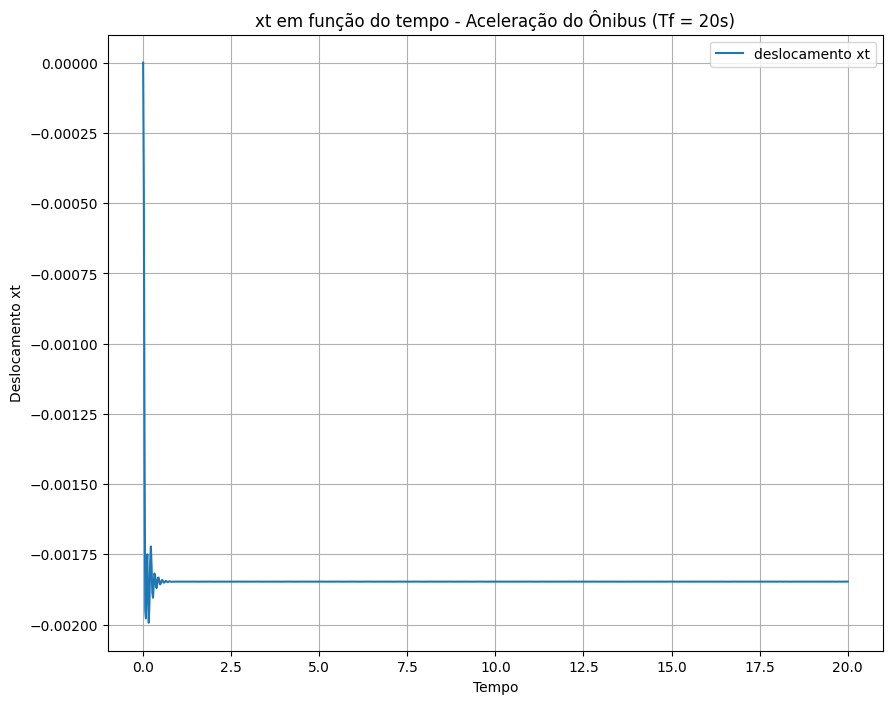

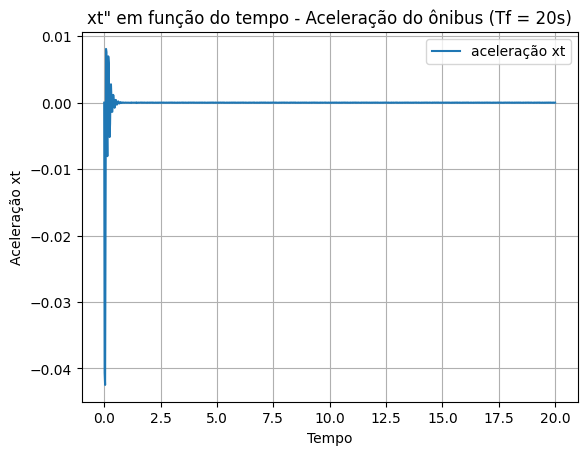

In [15]:
#aceleração com 20s
def equations(t, y, mb, mt, mp, mc, jc, Bc, Kc, g, Lc, kb, kt, kp, kcinto, kpe, bb, bt, bp, bcinto, bpe, u):
    xb, xt, xp, theta, xb_p, xt_p, xp_p, theta_p = y

    eq1 = xb_p
    eq2 = xt_p
    eq3 = xp_p
    eq4 = theta_p
    eq5 = -((kb+kt)/mb)*xb-(kt/mb)*xt-((bb+bt)/mb)*xb_p-(bt/mb)*xt_p-u
    eq6 = -(kt/(mt+mc))*xb-(kt+kp)/(mt+mc)*xt+(kp/(mt+mc))*xp+(bt/(mt+mc))*xb_p-((bt+bp)/(mt+mc))*xt_p+(bp/(mt+mc))*xp_p-u  
    eq7 = (kp/mp)*xt-((kp+kpe)/mp)*xp+(bp/mp)*xt_p-((bp+bpe)/mp)*xp_p-u
    eq8 = ((mc*Lc*g-Kc)/(jc+mc*Lc**2))*theta-((Bc)/jc+mc*Lc**2)*theta_p-u

    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

u = 2.49 #m/s^2

# Condições iniciais
initial_conditions = [0, 0, 0, 0, 0, 0, 0, 0]

# Tempo de integração
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solução do sistema de equações diferenciais
sol = solve_ivp(
    fun=lambda t, y: equations(t, y, mb, mt, mp, mc, jc, Bc, Kc, g, Lc, kb, kt, kp, kcinto, kpe, bb, bt, bp, bcinto, bpe, u),
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    method='DOP853'
)

# Plotando os resultados
plt.figure(figsize=(10, 8))

plt.plot(sol.t, sol.y[1], label='deslocamento xt')
plt.title('xt em função do tempo - Aceleração do Ônibus (Tf = 20s)')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento xt')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(sol.t, sol.y[5], label='aceleração xt')
plt.title('xt" em função do tempo - Aceleração do ônibus (Tf = 20s)')
plt.xlabel('Tempo')
plt.ylabel('Aceleração xt')
plt.legend()
plt.grid(True)
plt.show()

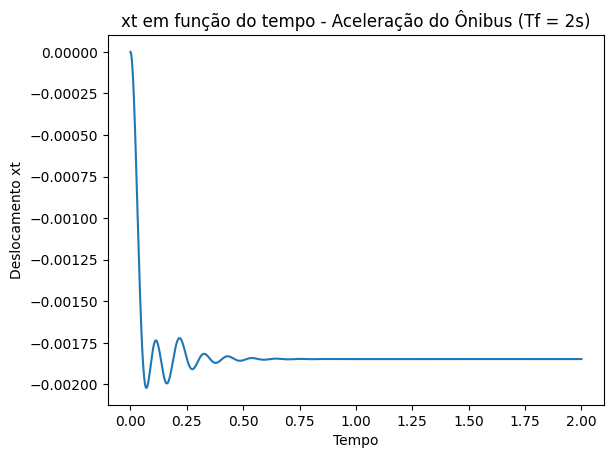

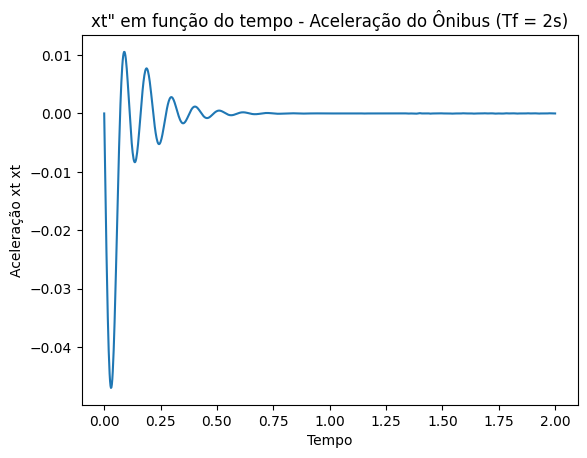

In [18]:
#aceleração com 2s
# Condições iniciais
xb0 = 0  # m
xt0 = 0  # m (ajustado para um valor diferente de zero)
xp0 = 0  # m (ajustado para um valor diferente de zero)
teta0 = 0  # rad
xbp0 = 0  # m
xtp0 = 0  # m
xpp0 = 0  # m
tetap0 = 0  # rad
u = 2.49  # m/s^2

# Condições iniciais do sistema
x0 = [xb0, xt0, xp0, teta0, xbp0, xtp0, xpp0, tetap0]

def sistema_naoLinear(t, x):
    xb, xt, xp, teta, xbp, xtp, xpp, tetap = x

    # Equações do sistema
    eq1 = xbp
    eq2 = xtp
    eq3 = xpp
    eq4 = tetap
    eq5 = -((kb + kt) / mb) * xb - (kt / mb) * xt - ((bb + bt) / mb) * xbp - (bt / mb) * xtp - u
    eq6 = -(kt / (mt + mc)) * xb - (kt + kp) / (mt + mc) * xt + (kp / (mt + mc)) * xp + (bt / (mt + mc)) * xbp - (
                (bt + bp) / (mt + mc)) * xtp + (bp / (mt + mc)) * xpp - u
    eq7 = (kp / mp) * xt - ((kp + kpe) / mp) * xp + (bp / mp) * xtp - ((bp + bpe) / mp) * xpp - u
    eq8 = ((mc * Lc * g - Kc) / (jc + mc * Lc ** 2)) * teta - ((Bc) / (jc + mc * Lc ** 2)) * tetap - u

    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

tf = 2.0
t = np.linspace(0, tf, 1000)

# Resolvendo as equações
s_n = solve_ivp(sistema_naoLinear, [0, tf], x0, method='DOP853', dense_output=True)
x_n = s_n.sol(t)

xt = x_n[1]
xt_pp = x_n[5]

# Plote o gráfico para a equação 2 (xt)
plt.title('xt em função do tempo - Aceleração do Ônibus (Tf = 2s)')
plt.plot(t, xt)
plt.xlabel('Tempo')
plt.ylabel('Deslocamento xt')
plt.show()
plt.title('xt" em função do tempo - Aceleração do Ônibus (Tf = 2s)')
plt.plot(t, xt_pp)
plt.xlabel('Tempo')
plt.ylabel('Aceleração xt xt')
plt.show()



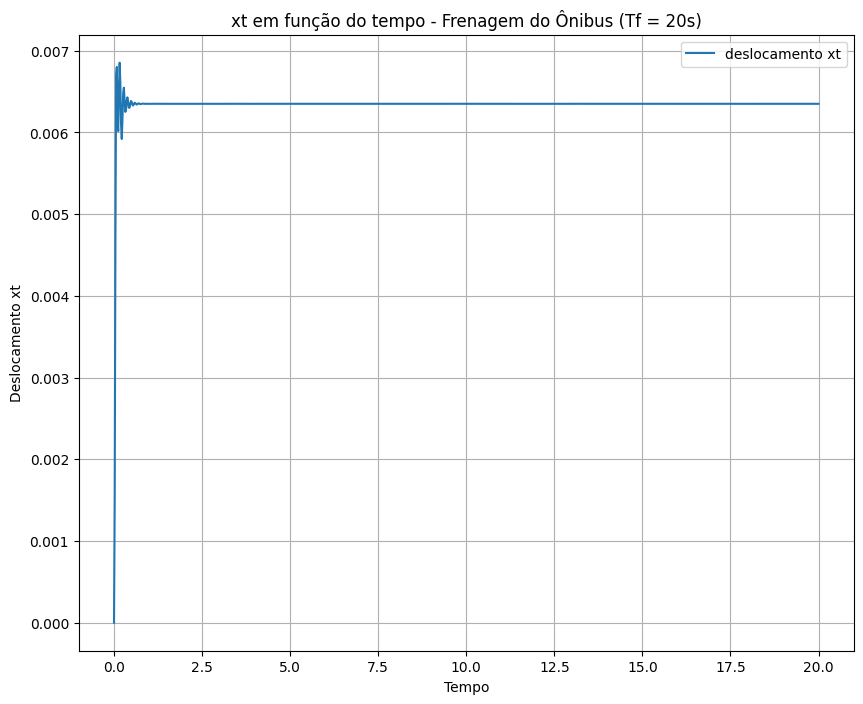

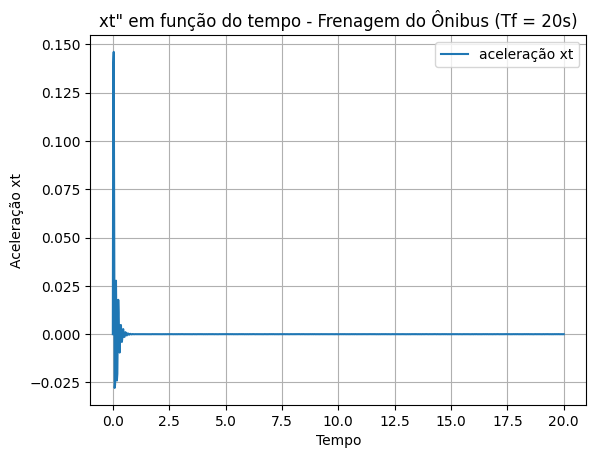

In [19]:
#idem para frenagem 20s
#aceleração com 20s
def equations(t, y, mb, mt, mp, mc, jc, Bc, Kc, g, Lc, kb, kt, kp, kcinto, kpe, bb, bt, bp, bcinto, bpe, u):
    xb, xt, xp, theta, xb_p, xt_p, xp_p, theta_p = y

    eq1 = xb_p
    eq2 = xt_p
    eq3 = xp_p
    eq4 = theta_p
    eq5 = -((kb+kt)/mb)*xb-(kt/mb)*xt-((bb+bt)/mb)*xb_p-(bt/mb)*xt_p-u
    eq6 = -(kt/(mt+mc))*xb-(kt+kp)/(mt+mc)*xt+(kp/(mt+mc))*xp+(bt/(mt+mc))*xb_p-((bt+bp)/(mt+mc))*xt_p+(bp/(mt+mc))*xp_p-u  
    eq7 = (kp/mp)*xt-((kp+kpe)/mp)*xp+(bp/mp)*xt_p-((bp+bpe)/mp)*xp_p-u
    eq8 = ((mc*Lc*g-Kc)/(jc+mc*Lc**2))*theta-((Bc)/jc+mc*Lc**2)*theta_p-u

    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

u = -8.56 #m/s^2

# Condições iniciais
initial_conditions = [0, 0, 0, 0, 0, 0, 0, 0]

# Tempo de integração
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solução do sistema de equações diferenciais
sol = solve_ivp(
    fun=lambda t, y: equations(t, y, mb, mt, mp, mc, jc, Bc, Kc, g, Lc, kb, kt, kp, kcinto, kpe, bb, bt, bp, bcinto, bpe, u),
    t_span=t_span,
    y0=initial_conditions,
    t_eval=t_eval,
    method='DOP853'
)

# Plotando os resultados
plt.figure(figsize=(10, 8))

plt.plot(sol.t, sol.y[1], label='deslocamento xt')
plt.title('xt em função do tempo - Frenagem do Ônibus (Tf = 20s)')
plt.xlabel('Tempo')
plt.ylabel('Deslocamento xt')
plt.legend()
plt.grid(True)
plt.show()
plt.plot(sol.t, sol.y[5], label='aceleração xt')
plt.title('xt" em função do tempo - Frenagem do Ônibus (Tf = 20s)')
plt.xlabel('Tempo')
plt.ylabel('Aceleração xt')
plt.legend()
plt.grid(True)
plt.show()



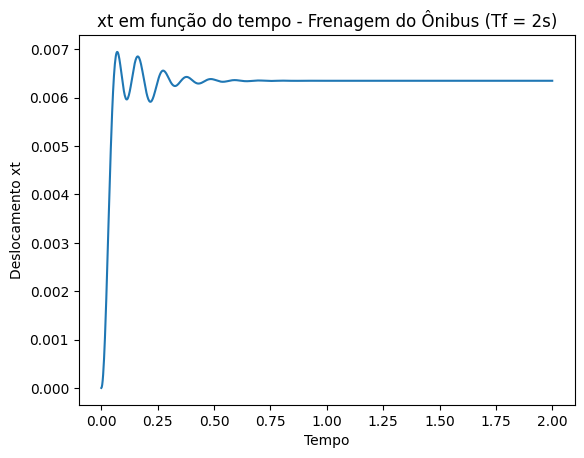

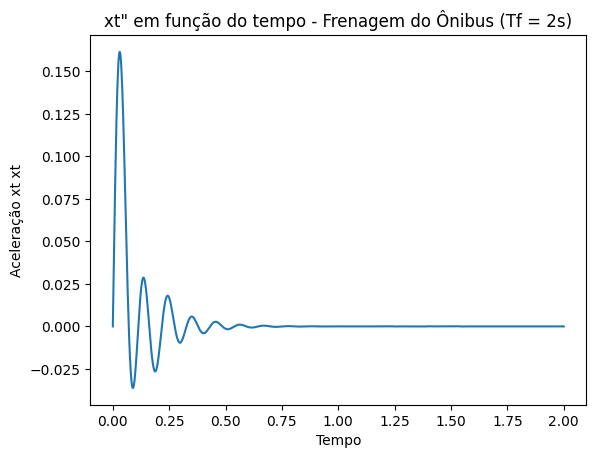

In [17]:
#frenagem 2s
#aceleração com 2s
# Condições iniciais
xb0 = 0  # m
xt0 = 0  # m (ajustado para um valor diferente de zero)
xp0 = 0  # m (ajustado para um valor diferente de zero)
teta0 = 0  # rad
xbp0 = 0  # m
xtp0 = 0  # m
xpp0 = 0  # m
tetap0 = 0  # rad
u = -8.56 # m/s^2

# Condições iniciais do sistema
x0 = [xb0, xt0, xp0, teta0, xbp0, xtp0, xpp0, tetap0]

def sistema_naoLinear(t, x):
    xb, xt, xp, teta, xbp, xtp, xpp, tetap = x

    # Equações do sistema
    eq1 = xbp
    eq2 = xtp
    eq3 = xpp
    eq4 = tetap
    eq5 = -((kb + kt) / mb) * xb - (kt / mb) * xt - ((bb + bt) / mb) * xbp - (bt / mb) * xtp - u
    eq6 = -(kt / (mt + mc)) * xb - (kt + kp) / (mt + mc) * xt + (kp / (mt + mc)) * xp + (bt / (mt + mc)) * xbp - (
                (bt + bp) / (mt + mc)) * xtp + (bp / (mt + mc)) * xpp - u
    eq7 = (kp / mp) * xt - ((kp + kpe) / mp) * xp + (bp / mp) * xtp - ((bp + bpe) / mp) * xpp - u
    eq8 = ((mc * Lc * g - Kc) / (jc + mc * Lc ** 2)) * teta - ((Bc) / (jc + mc * Lc ** 2)) * tetap - u

    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]

tf = 2.0
t = np.linspace(0, tf, 1000)

# Resolvendo as equações
s_n = solve_ivp(sistema_naoLinear, [0, tf], x0, method='DOP853', dense_output=True)
x_n = s_n.sol(t)

xt = x_n[1]
xt_pp = x_n[5]

# Plote o gráfico para a equação 2 (xt)
plt.title('xt em função do tempo - Frenagem do Ônibus (Tf = 2s)')
plt.plot(t, xt)
plt.xlabel('Tempo')
plt.ylabel('Deslocamento xt')
plt.show()
plt.title('xt" em função do tempo - Frenagem do Ônibus (Tf = 2s)')
plt.plot(t, xt_pp)
plt.xlabel('Tempo')
plt.ylabel('Aceleração xt xt')
plt.show()



Plotar gráfico

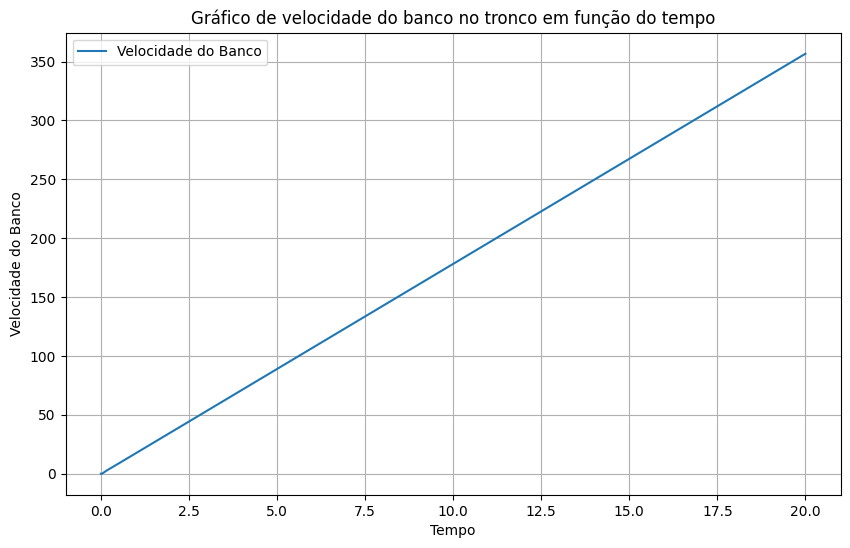

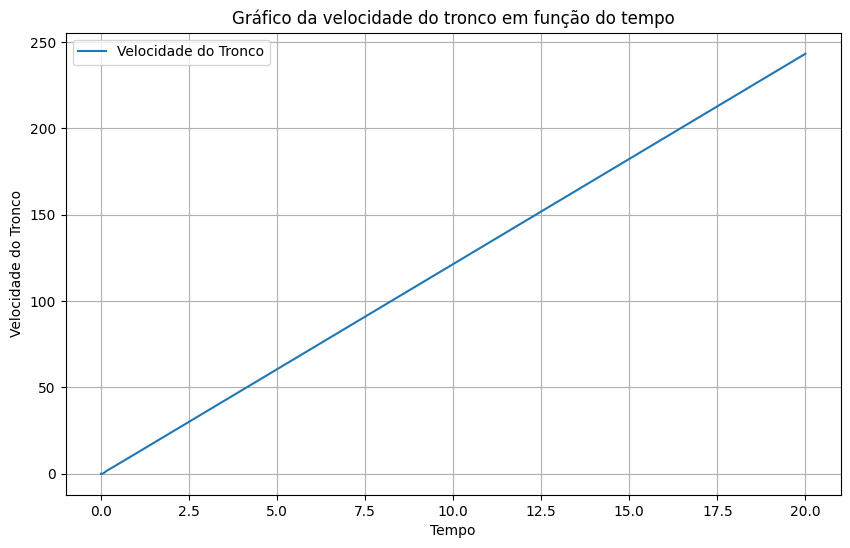

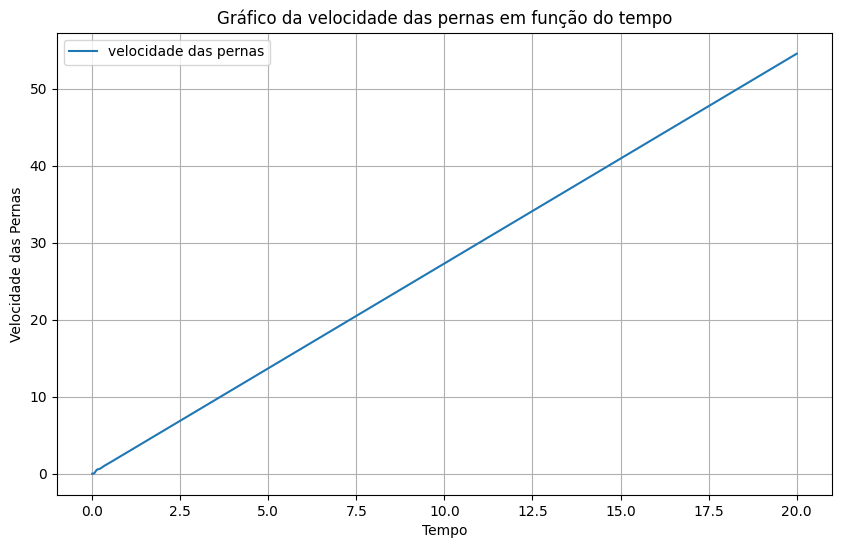

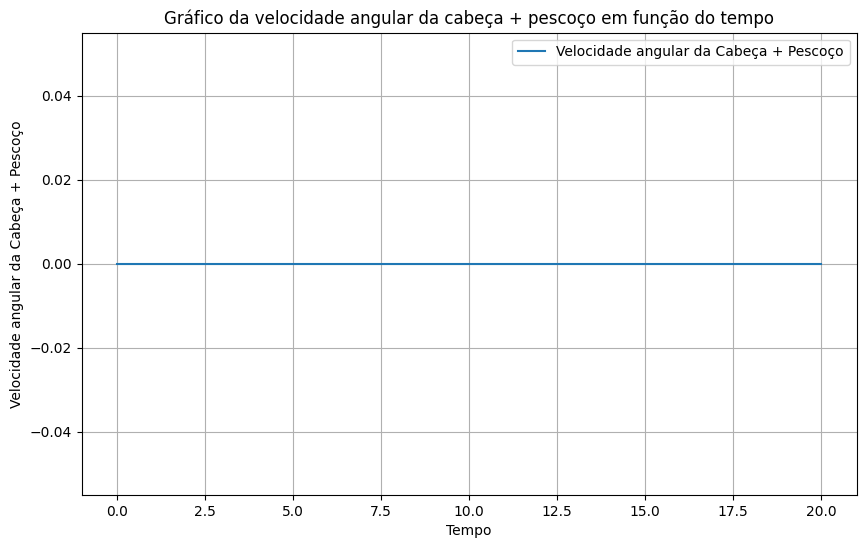

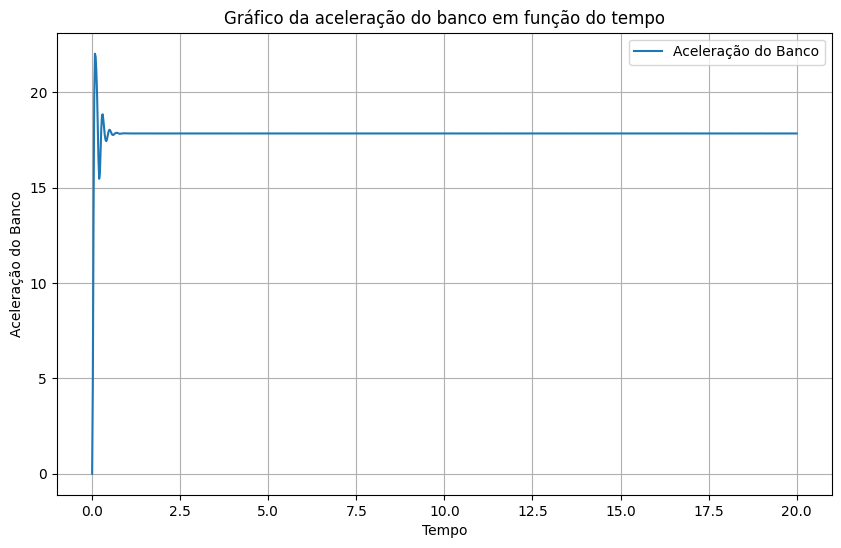

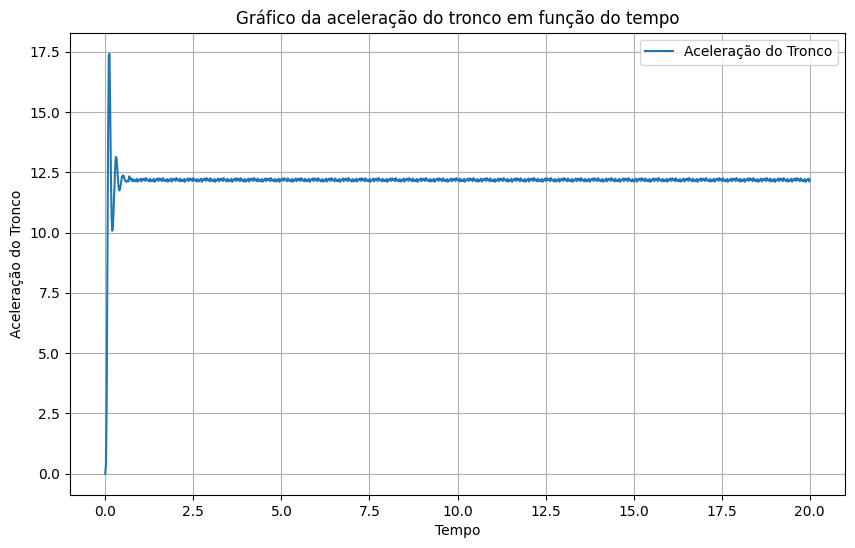

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

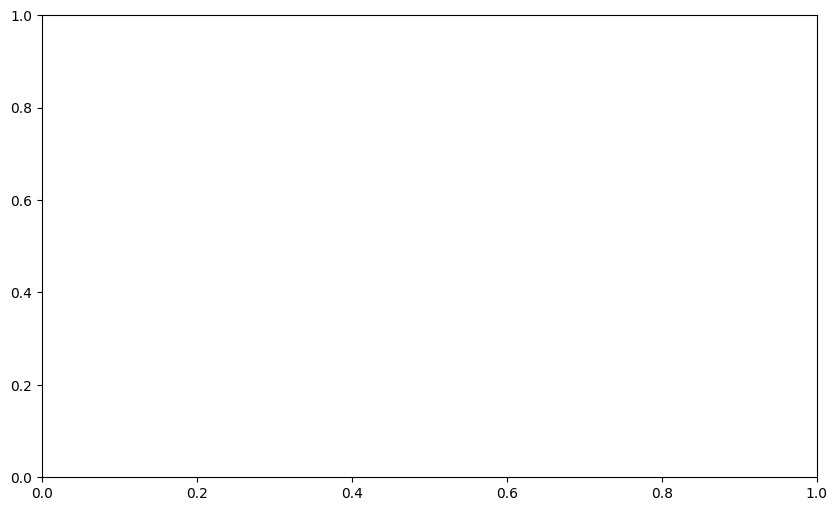

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, velbanco, label='Velocidade do Banco')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Banco')
plt.title('Gráfico de velocidade do banco no tronco em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, veltronco, label='Velocidade do Tronco')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Tronco')
plt.title('Gráfico da velocidade do tronco em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, velpernas, label='velocidade das pernas')
plt.xlabel('Tempo')
plt.ylabel('Velocidade das Pernas')
plt.title('Gráfico da velocidade das pernas em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, velangcabeca, label='Velocidade angular da Cabeça + Pescoço')
plt.xlabel('Tempo')
plt.ylabel('Velocidade angular da Cabeça + Pescoço')
plt.title('Gráfico da velocidade angular da cabeça + pescoço em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, acbanco, label='Aceleração do Banco')
plt.xlabel('Tempo')
plt.ylabel('Aceleração do Banco')
plt.title('Gráfico da aceleração do banco em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, actronco, label='Aceleração do Tronco')
plt.xlabel('Tempo')
plt.ylabel('Aceleração do Tronco')
plt.title('Gráfico da aceleração do tronco em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, acpernas, label='Aceleração das Pernas')
plt.xlabel('Tempo')
plt.ylabel('Aceleração das Pernas')
plt.title('Gráfico de aceleração das pernas em função do tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, acangcabeca, label='Aceleração Angular da Cabeça')
plt.xlabel('Tempo')
plt.ylabel('Aceleração Angular da Cabeça')
plt.title('Gráfico da aceleração angular da cabeça em função do tempo')
plt.legend()
plt.grid(True)
plt.show()